### Installing packages

- keras - deep learning
- scikit-learn - general purpose machine learning
- imbalanced-learn - methods that address class imbalance problem

In [ ]:
!pip install keras scikit-learn imbalanced-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Imports Libraries 

- numpy - linear algebra
- keras - deep learning
- tensorflow - training and inference of deep neural networks
- sklearn.dataset - to download Labeled Faces in the Wild dataset
- sklearn.model_selection - for dataset train/test split
- sklearn.metrics - to measure the performance of our classifier
- matplotlib.pyplot - showing images and plots
- imblearn.over_sampling - random oversampling method to handle class imalance

In [ ]:
import numpy as np
import keras
import tensorflow as tf
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler

### Labeled Faces in the Wild dataset

The cell below downloads the dataset using `fetch_lfw_people` function and checks the dimensionality of the dataset.

There are some parameters that control e.g. the minimum number of images per class (person), image size, etc.



In [ ]:
lfw_people = fetch_lfw_people(min_faces_per_person=20, color=True, resize=1.0,
                              slice_=(slice(48, 202), slice(48, 202)))

X = lfw_people.images
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print('number of examples: {}'.format(y.shape[0]))
print('dimensionality of images: {}'.format(X.shape[1:]))
print('number of unique classes (people): {}'.format(n_classes))

number of examples: 3023
dimensionality of images: (154, 154, 3)
number of unique classes (people): 62


**Printing names of 62 classes / Names**


In [ ]:
print (target_names)


['Alejandro Toledo' 'Alvaro Uribe' 'Amelie Mauresmo' 'Andre Agassi'
 'Angelina Jolie' 'Ariel Sharon' 'Arnold Schwarzenegger'
 'Atal Bihari Vajpayee' 'Bill Clinton' 'Carlos Menem' 'Colin Powell'
 'David Beckham' 'Donald Rumsfeld' 'George Robertson' 'George W Bush'
 'Gerhard Schroeder' 'Gloria Macapagal Arroyo' 'Gray Davis'
 'Guillermo Coria' 'Hamid Karzai' 'Hans Blix' 'Hugo Chavez' 'Igor Ivanov'
 'Jack Straw' 'Jacques Chirac' 'Jean Chretien' 'Jennifer Aniston'
 'Jennifer Capriati' 'Jennifer Lopez' 'Jeremy Greenstock' 'Jiang Zemin'
 'John Ashcroft' 'John Negroponte' 'Jose Maria Aznar'
 'Juan Carlos Ferrero' 'Junichiro Koizumi' 'Kofi Annan' 'Laura Bush'
 'Lindsay Davenport' 'Lleyton Hewitt' 'Luiz Inacio Lula da Silva'
 'Mahmoud Abbas' 'Megawati Sukarnoputri' 'Michael Bloomberg' 'Naomi Watts'
 'Nestor Kirchner' 'Paul Bremer' 'Pete Sampras' 'Recep Tayyip Erdogan'
 'Ricardo Lagos' 'Roh Moo-hyun' 'Rudolph Giuliani' 'Saddam Hussein'
 'Serena Williams' 'Silvio Berlusconi' 'Tiger Woods' 'Tom Das

**Plot a Histogram showing how many examples per class**

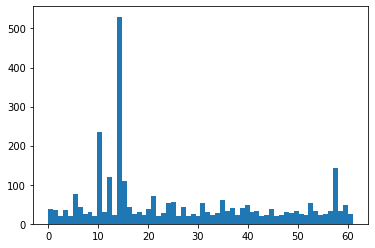

In [ ]:
_ = plt.hist(y, bins=n_classes)

**Display a random image along with its label.**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Roh Moo-hyun


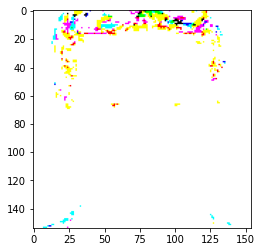

In [ ]:
i = np.random.randint(len(lfw_people.images))
plt.imshow(lfw_people.images[i] * 255)
plt.grid(False)
print(target_names[y[i]])

### Deep learning


Import some layer objects from Keras.

In [ ]:
from keras.layers import Input
from keras.layers import Conv2D, GlobalAvgPool2D
from keras.layers import Dropout, Activation


Below we define our model.
It consists of 10 convolutional layers with increasing number of filters (from 12 to 48).
Every second layer has kernels of size `(2, 2)` with strides `(2, 2)` and serves the purpose of a trainable pooling layer since it reduces spacial dimensionality.
After that, we add Dropout for regularization which sets 50% of randomly chosen activations to 0.
Then, we add the last convolutional layer for dimensionality expansion to match the number of classes that we predict.
Finallly, we apply global average polling to squash spacial dimenaions.
We could do that with another convolutional layer or a fully connected leyer, however, it would increase the number of weights to train and, in turn, a risk of overfitting.


In [ ]:
input = Input(shape=X.shape[1:])                                  # 154x154x3
x = Conv2D(12, (3, 3), padding='same', activation='relu')(input)  # 154x154x12
x = Conv2D(12, (2, 2), strides=(2, 2), activation='relu')(x)      # 77x77x12
x = Conv2D(16, (3, 3), padding='same', activation='relu')(x)      # 77x77x16
x = Conv2D(16, (2, 2), strides=(2, 2), activation='relu')(x)      # 38x38x16
x = Conv2D(24, (3, 3), padding='same', activation='relu')(x)      # 38x38x24
x = Conv2D(24, (2, 2), strides=(2, 2), activation='relu')(x)      # 19x19x24
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)      # 19x19x32
x = Conv2D(32, (2, 2), strides=(2, 2), activation='relu')(x)      # 9x9x32
x = Conv2D(48, (3, 3), padding='same', activation='relu')(x)      # 9x9x48
x = Conv2D(48, (2, 2), strides=(2, 2), activation='relu')(x)      # 4x4x48
x = Dropout(0.5)(x)                                               # 4x4x48
x = Conv2D(n_classes, (1, 1))(x)                                  # 4x4x62
x = GlobalAvgPool2D()(x)                                          # 62
output = Activation('softmax')(x)                                 # 62


# Plotting the CNN architecture

In [ ]:
from keras.models import Model
model = Model(inputs=input, outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 154, 154, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 154, 154, 12)      336       
                                                                 
 conv2d_1 (Conv2D)           (None, 77, 77, 12)        588       
                                                                 
 conv2d_2 (Conv2D)           (None, 77, 77, 16)        1744      
                                                                 
 conv2d_3 (Conv2D)           (None, 38, 38, 16)        1040      
                                                                 
 conv2d_4 (Conv2D)           (None, 38, 38, 24)        3480      
                                                                 
 conv2d_5 (Conv2D)           (None, 19, 19, 24)        2328  


**Create a `DataGenerator` object for adding some data augmentation to prevent overfitting.**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.05,
    zoom_range=0.1)

### Training

Define training procedure that involves setting some hyperparameters, e.g. batch size, optimization algorithm and base learning rate, number of epochs, etc.

In [ ]:
from keras import Model

batch_size = 256
test_split = 0.2
base_lr = 0.001
epochs = 120

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_split, 
                                                    stratify=y, random_state=42)

# oversampling each class to contain at least 256 examples
sampling_targets = np.maximum([256] * n_classes, np.bincount(y_train))
ratio_dict = dict(zip(range(n_classes), sampling_targets))
ros = RandomOverSampler(sampling_strategy=ratio_dict, random_state=42)

X_train_shape = X_train.shape
X_train = np.reshape(X_train, (X_train_shape[0], -1))
X_train, y_train = ros.fit_resample(X_train, y_train)
X_train = np.reshape(X_train, (len(X_train),) + X_train_shape[1:])

# encoding of labels
y_train = keras.utils.np_utils.to_categorical(y_train, n_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, n_classes)

# compile model and define optimization
model = Model(inputs=input, outputs=output)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Nadam(lr=base_lr),
              metrics=['accuracy'])

# model training 🎉
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                    steps_per_epoch=len(X_train) / batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/nadam.py:73: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Nadam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/120
62/62 [==============================] - 91s 1s/step - loss: 4.1268 - accuracy: 0.0266 - val_loss: 4.0492 - val_accuracy: 0.0579
Epoch 2/120
62/62 [==============================] - 74s 1s/step - loss: 3.9379 - accuracy: 0.0416 - val_loss: 3.7042 - val_accuracy: 0.1289
Epoch 3/120
62/62 [==============================] - 74s 1s/step - loss: 3.7498 - accuracy: 0.0656 - val_loss: 3.6382 - val_accuracy: 0.1504
Epoch 4/120
62/62 [==============================] - 74s 1s/step - loss: 3.5591 - accuracy: 0.0981 - val_loss: 3.5116 - val_accuracy: 0.1008
Epoch 5/120
62/62 [==============================] - 74s 1s/step - loss: 3.3405 - accuracy: 0.1392 - val_loss: 3.2876 - val_accuracy: 0.1587
Epoch 6/120
62/62 [==============================] - 74s 1s/step - loss: 3.1850 - accuracy: 0.1680 - val_loss: 3.2037 - val_accuracy: 0.1851
Epoch 7/120
62/62 [==============================] - 75s 1s/step - loss: 3.0344 - accuracy: 0.1932 - val_loss: 2.9165 - val_accuracy: 0.2595
Epoch 8/120
6

**Saving the trained weight to Google Drive.**

In [ ]:
model.save('weights.h5')

### Results

**Plot the training history to assess model's accuracy.**


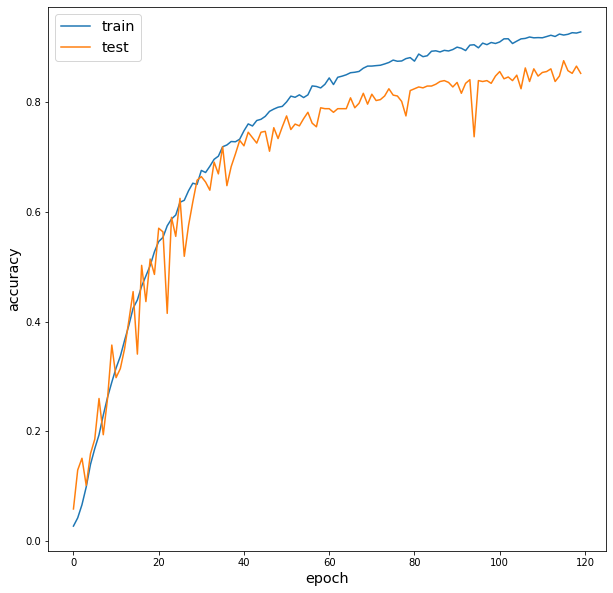

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy', fontsize='x-large')
plt.xlabel('epoch', fontsize='x-large')
plt.legend(['train', 'test'], loc='upper left', fontsize='x-large')


**Get predictions from the test set to visualize results.**

In [ ]:
y_pred = model.predict(X_test, batch_size=len(X_test), verbose=1)
y_pred = np.argmax(y_pred, axis=1)

1/1 [==============================] - 2s 2s/step


 **Confusion Matrix** 

In [ ]:
def plot_confusion_matrix(cm, classes, cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    tick_marks = np.arange(0, len(classes), 2)
    plt.xticks(tick_marks, classes[tick_marks], rotation=90)
    plt.yticks(tick_marks, classes[tick_marks])
    plt.ylabel('True label', fontsize='x-large')
    plt.xlabel('Predicted label', fontsize='x-large')

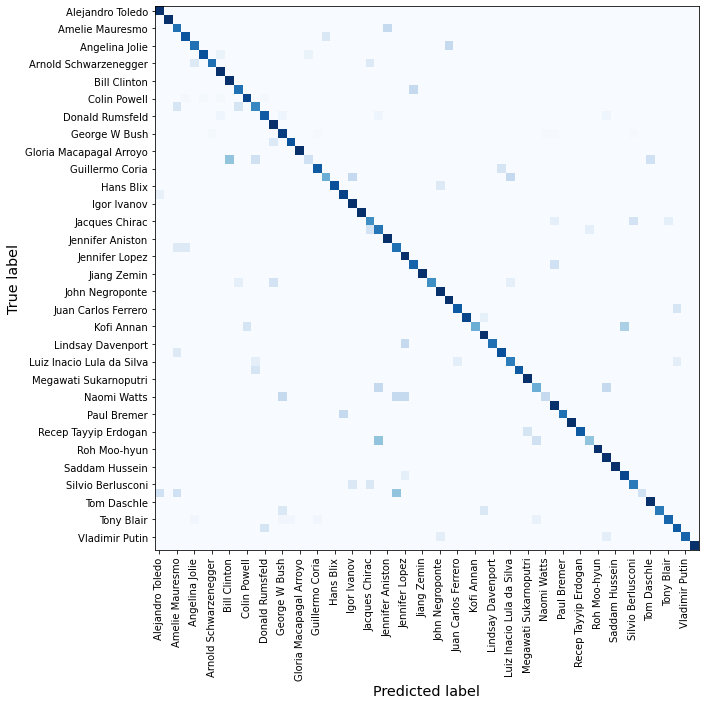

In [ ]:
plt.figure(figsize=(10, 10))
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(cm, classes=target_names)
plt.grid(False)

**Assuming that all classes have the same importance, more appropriate measure would be the average accuracy among all classes.**

In [ ]:
def plot_barh(labels, values):
    fig = plt.figure(figsize=(12, 8))
    y_pos = np.arange(len(labels))
    plt.barh(y_pos, values, align='center', alpha=0.5)
    plt.yticks(y_pos, labels)
    plt.xticks(np.arange(0.0, 1.0, 0.05))
    plt.xlabel('accuracy', fontsize='x-large')
    plt.axes().xaxis.grid(color='black', linestyle='-', linewidth=0.5)
    axes = plt.gca()
    axes.set_xlim([0.0, 1.0])
    axes.axvline(np.mean(values), color='green', linewidth=2)
    plt.tight_layout()

In [ ]:
class_accuracies = [cm[i, i] for i in range(cm.shape[0])]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


average accuracy: 82.2%


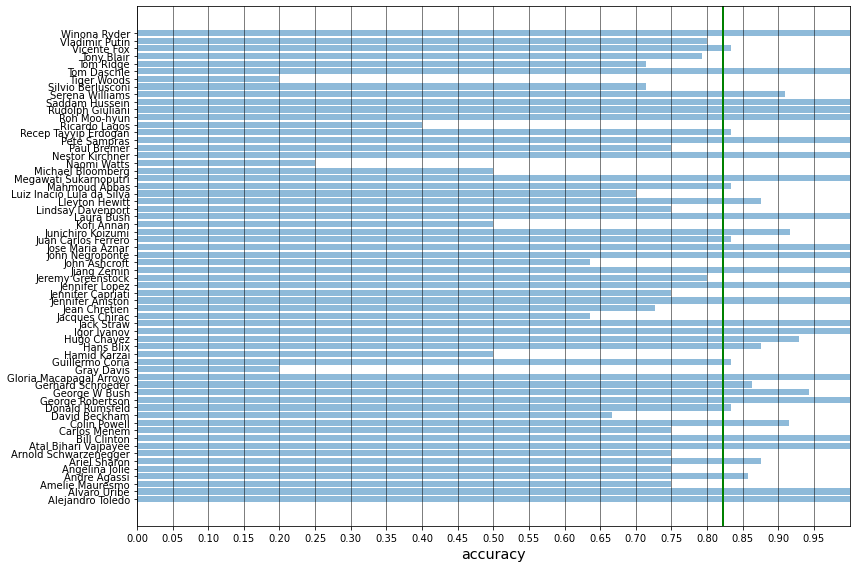

In [ ]:
plot_barh(target_names, class_accuracies)
print('average accuracy: {}%'.format(np.round(np.mean(class_accuracies) * 100.0, 1)))

**Calculating Recall**

In [ ]:
recall = np.diag(cm) / np.sum (cm, axis = 1)

np.mean(recall)


0.8217216066461057

**Calculating Precision**

In [ ]:
precision = np.diag(cm) / np.sum (cm, axis = 0)
np.mean(precision)

0.8450108062768593